In [35]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

В предложенном файле находится набор синтетических данных. Данные описывают 60 объектов, каждый из которых обладает 10 признаками. Ваша задача, используя метод главных компонент, перейти к новым координатам и найти следующие параметры.

Введите координату первого объекта относительно первой главной компоненты.
Десятичный разделитель точка. Ответ округлите до тысячных.
Введите координату первого объекта относительно второй главной компоненты.
Десятичный разделитель точка. Ответ округлите до тысячных.
Введите долю объясненной дисперсии при использовании первых двух главных компонент.
Десятичный разделитель точка. Ответ округлите до тысячных.
Какое минимальное количество главных компонент необходимо использовать,
чтобы доля объясненной дисперсии превышала 0.85
Введите целое неотрицательное число
Какое количество групп объектов можно выделить,
если использовать только первые две главных компоненты?
Введите целое неотрицательное число

In [36]:
df = pd.read_csv("/Users/ekaterina/github_repos/ITMO_STUDY/ datasets/IZ_35.1_MGC.csv", delimiter=',', header=None)# , index_col='0'
print(df)

            0          1          2          3          4          5  \
0   10.382991 -14.438544 -23.950798 -17.809813   2.480495 -15.743114   
1   18.987842 -13.071734  15.619164 -11.288528 -11.624820  14.845464   
2    7.426000  -9.236580 -21.139348   6.732592   0.447684 -20.687020   
3   10.718844 -10.240587 -20.604991   4.828083  -0.073568 -23.747055   
4   10.662165   3.871777  12.384108  -1.921321  -1.990254  -5.469310   
5    9.601509 -17.334996 -24.127299 -19.342414   0.492613 -13.377177   
6    9.775003  -8.705064 -21.636552   7.356519   2.160537 -23.072937   
7   11.259948 -14.889241 -21.940512 -16.009979   0.024598 -15.101501   
8    9.990271 -10.760423 -23.022906   5.507930  -0.164068 -23.644331   
9   10.085331 -14.157765 -24.167099 -17.898493  -0.233567 -15.999375   
10  10.198366 -15.496165 -22.754700 -17.826823  -1.290287 -16.617527   
11  12.039945   7.374109  10.380017  -1.387856  -4.651388  -5.481744   
12  10.234598   6.394659  10.012672  -4.805150  -3.686101  -6.56

In [37]:
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,13.648938,-7.175716,-5.609337,-6.107276,-2.965088,-7.997695,-8.725442,-3.060533,0.912637,3.524539
std,5.410092,7.810819,17.654396,8.925655,4.599278,14.330792,6.859131,19.763887,19.750764,9.393779
min,6.914555,-17.334996,-26.707794,-20.397205,-12.939674,-26.324817,-21.548309,-27.390035,-26.237301,-7.650646
25%,10.021664,-13.027605,-22.980626,-12.779413,-5.742113,-18.292393,-15.139137,-21.486845,-16.531338,-2.343354
50%,11.333764,-9.721820,-6.977941,-6.146143,-1.451712,-11.222941,-9.507880,-5.578858,2.247679,-0.145523
75%,15.523334,-4.423073,11.708101,0.097262,0.257695,0.626118,-4.138139,13.180596,19.074481,7.649601
max,25.095918,7.374109,15.992131,9.412555,3.928127,16.158754,3.907143,25.980566,25.302010,22.819532


In [38]:
df.shape

(60, 10)

Уменьшим размерность при помощи библиотеки `sklearn`. Отдельно обратим внимание на параметр `svd_solver` — параметр, отвечающий за способ построения матричного разложения. Чтобы получать согласованные с лекцией результаты,  используем параметр `svd_solver = 'full'`.

Оказывается, для того чтобы получить новые координаты объектов, достаточно написать две следующие строчки.

In [39]:
pca = PCA(n_components = 2, svd_solver = 'full') #Создание объекта класса PCA. В качестве параметров выступает количество ГК и метод оптимизации svd_solver = 'full'(фулл означает, что мы хлотим не приближенное, а точное значение)
df_transformed = pca.fit_transform(df) #X_transformed — ndarray объектов, где каждый объект описывается двумя ГК

Выведем полученные новые координаты объекта с индексом 0.

In [40]:
df_transformed[0]

array([-19.05792582,  31.91261445])

Теперь обсудим детали. Матрица весов хранится в поле `components_` класса `pca` и имеет размеры *(количество ГК, начальное количество признаков)*. Это значит, что матрица весов $\varPhi$, описанная в лекции, связана с матрицей весов `pca.components_`, выдаваемой инструментом, соотношением
$$
\varPhi = (\text{pca.components_})^T.
$$

In [41]:
print(pca.components_.shape) # В нашем случае матрица размер 2 х 10 - т к n_components = 2(кол-во гл.компонент)
pca.components_

(2, 10)


array([[ 0.18350193, -0.03302002,  0.43776131, -0.07859612, -0.14966591,
         0.46775475,  0.05267998,  0.52494143, -0.49533105, -0.0503834 ],
       [ 0.0174599 , -0.31725924, -0.47573442, -0.28194334,  0.0239379 ,
        -0.0960839 , -0.16039653, -0.13156141, -0.63942788,  0.36265389]])

Установив связь между тем, что выдает инструмент, и тем, что описано в лекции, наглядно продемонстрируем, что новые координаты объектов можно получить и непосредственным умножением матрицы объектов на матрицу весов. Отметим, что в таком случае исходные координаты объектов необходимо предварительно центрировать.

In [42]:
# Выведем новые координаты объекта с индексом 0
np.dot(df-df.mean(axis=0), pca.components_.T)[0]# df-df.mean -  центрирование

array([-19.05792582,  31.91261445])

In [44]:
# Если использовать библиотечный метод, то все преобразования производятся автоматически
#pca.transform([df[0]])

Т к  отклики нам неизвестны-строим график и все точки красим одним цветом, смотрим, как на шрафике образовались четкие группы точек. 

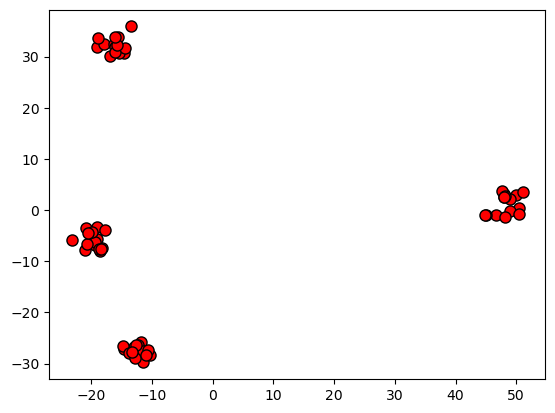

In [55]:
plt.plot(df_transformed[:61, 0], df_transformed[:61, 1], 'o', markerfacecolor='red', markeredgecolor='k', markersize=8)

У нас получилось 4 группы объектов

Для дальнейшего анализа нам необходимо будет построить не 2, а все 10 ГК (хотя, конечно, это можно было сделать и сразу, а картинку строить лишь по первым двум), т к нам необходимо посчитать долю объясненноц дисперсии. Изначально у нас было 10 признаков

In [47]:
pca = PCA(n_components=10, svd_solver='full')
df_full = pca.fit(df).transform(df)

Найдем долю объясненной дисперсии в зависимости от количества используемых ГК. Она храниться в поле xplained_variance_ratio_, для ее поиска необходимо найти куммулятивную сумму

In [48]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3) # сumsum - куммулятивная сумма
explained_variance

array([0.492, 0.781, 0.991, 0.993, 0.995, 0.996, 0.998, 0.999, 0.999,
       1.   ])

Построим график зависимости доли объясненной дисперсии от количества используемых ГК. Подробное описание произведено в лекции.

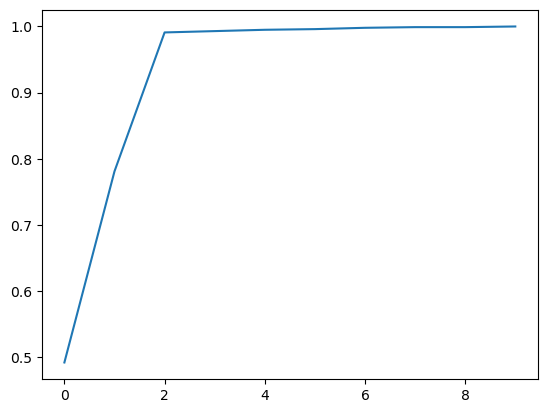

In [51]:
plt.plot(np.arange(10), explained_variance, ls = '-')

In [56]:
treshold=0.85
dim=0
for value in explained_variance:
    if value > treshold:
        print("Минимальное количество ГК для превышения заданного порога", dim+1)
        break
    dim +=1




Минимальное количество ГК для превышения заданного порога 3
